In [2]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# JS :
# function bitReversal(m, gamma) {
#     //m é o número a inverter, M = 2^gamma
#     //retorna o bitreversal do numero.
#     var x = 0;
#     for (let i = 0; i < gamma; i++) {
# 	c = m >> 1;
# 	x = (x << 1) + (m - (c << 1));
# 	m = c;
#     }
#     return x;
# }

# function getRoundSquare(n) {
#     var i = 0;
#     var m = n
#     while (m != 1) {
# 	m = m >> 1;
# 	i = i + 1;
#     }
#     if (1 << i == n)
# 	return [1 << i, i];
#     return [1 << (i+1), i+1];
# }

# function normalizeArray(x, n) {
#     //pega um array de tamanho arbitrário e "normaliza-o" com o tamanho n (2^m)
#     //faz ter tamanho de potencia de 2 (zero-padding) e os itens viram array 2D
#     y = new Array(n);
#     k = x.length;
#     for (let i = 0; i < n; i++) {
# 	if (i < k)
# 	    y[i] = [x[i],0];
# 	else
# 	    y = y.concat([[0,0]]);
#     }
#     return y;
# }

# function recFFT(x) {
#     //usa recursão pra calcular FFT.
#     var tam, ltam;
#     [tam, ltam] = getRoundSquare(x.length);
#     console.log(tam);
#     var y = normalizeArray(x, tam);
#     var W = new Array(tam);
#     for (let i = 0; i < tam; i++) {
# 	if (i < (tam >> 1))
# 	    W[i] = [Math.cos(2 * Math.PI * i/tam), Math.sin(2 * Math.PI * i/tam)];
# 	else
# 	    W[i] = [-W[i-(tam >>1)][0],-W[i-(tam >>1)][1]]
#     }
#     return auxRecFFT(y, ltam, ltam, W);
# }

# function auxRecFFT(x, ltam0, ltamT, W) {
#     //y no topo da recursão : ltam 0 = lg(y.length)
#     //ltam0 e ltamT pra dar um track da potencia da unidade a usar.
#     console.log(x);
#     console.log(ltamT);
#     if (ltamT == 0)
# 	return x;
#     //separar pares dos ímpares :
#     var pares = new Array(1 << (ltamT - 1));
#     var impares = new Array(1 << (ltamT - 1));
#     var res = new Array(1 << ltamT);
#     for (let i = 0; i < x.length; i++) {
# 	if ((i - ((i >> 1) << 1)) == 0)
# 	    pares[i] = x[i >> 1];
# 	else
# 	    impares[i] = x[i >> 1];
#     }
#     var res1 = auxRecFFT(pares, ltam0, (ltamT-1), W);
#     var res2 = auxRecFFT(impares, ltam0, (ltamT-1), W);
#     for (let i = 0; i < (x.length >> 1); y++) {
# 	//res[i] = pares[i] + W[(1 << (ltam0 - ltamt)) * i] * impares[i];
# 	res[i] = [res1[i][0] + (W[(1 << (ltam0 - ltamT)) * i] * res2[i])[0],
# 		  res1[i][1] + (W[(1 << (ltam0 - ltamT)) * i] * res2[i])[1]];
# 	res[i+ltamT] = [res1[i][0] - (W[(1 << (ltam0 - ltamT)) * i] * res2[i])[0],
# 			res1[i][1] - (W[(1 << (ltam0 - ltamT)) * i] * res2[i])[1]];
# 	console.log(res[i]);
#     }
#     return res;
# }

# function FFT(x) {
#     //x array com PCM do som
#     //sr o sampling rate do som
#     var tam, ltam, k;
#     k = 0; 
#     [tam, ltam] = getRoundSquare(x.length);
#     var ltam1 = x.length;
#     var tam2 = tam >> 1; //tam2 = piso de tam/2
#     var w = new Array(tam);
#     //preparando x; transformando num array em R² e fazendo zero-padding
#     for (let i = 0; i < tam; i++) {
# 	if (i < ltam1)
# 	    x[i] = [x[i],0];
# 	else
# 	    x = x.concat([[0,0]]);
# 	if (i < tam2)
# 	    w[i] = [Math.cos(2 * Math.PI * i/tam), Math.sin(2 * Math.PI * i/tam)];
# 	else
# 	    w[i] = [-w[i-tam2][0],-w[i-tam2][1]]
#     }
#     ltam1 = ltam - 1;
#     for (let l = 0; l < ltam; l++) {
# 	do {
# 	    for (let i = 1; i < tam2; i++) {
# 		//console.log("muda x");
# 		M = k >> ltam1;
# 		let p = bitReversal(M, ltam);
# 		console.log(k);
# 		console.log(tam2);
# 		console.log('\n');
# 		let T = [w[p][0] * x[k + tam2][0] - w[p][1] * x[k + tam2][1],
# 			 w[p][0] * x[k + tam2][1] + w[p][1] * x[k + tam2][0]];
# 		console.log("T : " + String(T) + "\n x[k] : " + String(x[k]) );
# 		x[k + tam2] = [x[k + tam2][0] - T[0], x[k + tam2][1] - T[1]];
# 		x[k] = [x[k + tam2][1] - T[1], x[k + tam2][1] + T[1]];
# 		console.log("x[k] : " + String(x[k]));
# 		k++;
# 	    }
# 	    k = k + tam2;
# 	} while (k < tam);
# 	k = 0;
# 	ltam1 = ltam - 1;
# 	tam2 = tam2 >> 1;
#     }
#     while (k != tam-1) {
# 	let i = bitReversal(k, ltam);
# 	if (i > k) {
# 	    let T = x[k];
# 	    x[k] = x[i];
# 	    x[i] = T;
# 	}
# 	k++;
#     }
#     return x;
# }

In [4]:
# function getRoundSquare(n) {
#     var i = 0;
#     var m = n
#     while (m != 1) {
# 	m = m >> 1;
# 	i = i + 1;
#     }
#     if (1 << i == n)
# 	return [1 << i, i];
#     return [1 << (i+1), i+1];
# }
def getRoundSquare(n):
    i = 0
    m = n
    while (m != 1):
        m = m >> 1
        i = i + 1
    if (n == (1 << i)):
        return i
    return i+1

def fft(x):
    if x.size == 1:
        return x
    if x.size == 2:
        return recFFT(x, 1, 1, np.array([-1,1], dtype=complex))
    n = getRoundSquare(x.size)
    W = np.empty(1 << n, dtype=complex)
    for i in range((1 << n) >> 2) :
        W[i] = np.complex(str(np.cos((2*np.pi*i) / (1 << n))) + "+" + str(np.sin((2*np.pi*i) / (1 << n))) + "j")
        W[i + ((1 << n) >> 1)] = - W[i]
        W[i + ((1 << n) >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
        W[i + ((1 << n) >> 2) + ((1 << n) >> 1)] = -W[i + ((1 << n) >> 2)]
    print(W)
    return recFFT(x, 0, n, W)

# def recFFT2(x):
#     n = x.size
#     if (n == 1) :
#         return x
#     impares = np.empty(x.size >> 1, dtype=complex)
#     pares = np.empty(x.size >> 1, dtype=complex)
#     res = np.empty(x.size, dtype=complex)
#     for i in range(x.size) :
#         if (i - ((i >> 1) << 1)) :
#             impares[i >> 1] = x[i]
#         else :
#             print(pares.size)
#             pares[(i >> 1)] = x[i]
#     res1 = recFFT(pares, n+1, N, W)
#     res2 = recFFT(impares, n+1, N, W)
    

def recFFT(x, n, N, W):
    #2^n-esima raiz da un. de 2^N raízes
    if (n == N) :
        return x
    impares = np.empty(x.size >> 1, dtype=complex)
    pares = np.empty(x.size >> 1, dtype=complex)
    res = np.empty(x.size, dtype=complex)
    for i in range(x.size) :
        if (i - ((i >> 1) << 1)) :
            impares[i >> 1] = x[i]
        else :
            pares[(i >> 1)] = x[i]
    res1 = recFFT(pares, n+1, N, W)
    res2 = recFFT(impares, n+1, N, W)
    print(res1)
    print(res2)
    for i in range(x.size >> 1):
        res[i] = res1[i] + W[(((n+1)*i) % (1<<N))]*res2[i]
        res[i + (x.size >> 1)] = res1[i] - W[(((n+1)*i) % (1<<N))]*res2[i]
    return res

In [5]:
x = np.array([1,2,3,4], dtype=complex)
x.size

4

In [6]:
fft(x)

[ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]
[1.+0.j]
[3.+0.j]
[2.+0.j]
[4.+0.j]
[ 4.+0.j -2.+0.j]
[ 6.+0.j -2.+0.j]


array([10.+0.j, -2.-2.j, -2.+0.j, -2.+2.j])

In [270]:
np.fft.fft([1,2,3,4])

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [8]:
np.power(np.exp(np.complex(str(np.pi/64) + "j")),32)

(2.220446049250313e-16+1.0000000000000009j)

In [9]:
fft(np.array([1,2,3,4],dtype=complex))

[ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]
[1.+0.j]
[3.+0.j]
[2.+0.j]
[4.+0.j]
[ 4.+0.j -2.+0.j]
[ 6.+0.j -2.+0.j]


array([10.+0.j, -2.-2.j, -2.+0.j, -2.+2.j])

In [10]:
a = np.complex('2+34j')
str(a)

'(2+34j)'

In [11]:
# function FFT(x) {
#     //x array com PCM do som
#     //sr o sampling rate do som
#     var tam, ltam, k;
#     k = 0; 
#     [tam, ltam] = getRoundSquare(x.length);
#     var ltam1 = x.length;
#     var tam2 = tam >> 1; //tam2 = piso de tam/2
#     var w = new Array(tam);
#     //preparando x; transformando num array em R² e fazendo zero-padding
#     for (let i = 0; i < tam; i++) {
# 	if (i < ltam1)
# 	    x[i] = [x[i],0];
# 	else
# 	    x = x.concat([[0,0]]);
# 	if (i < tam2)
# 	    w[i] = [Math.cos(2 * Math.PI * i/tam), Math.sin(2 * Math.PI * i/tam)];
# 	else
# 	    w[i] = [-w[i-tam2][0],-w[i-tam2][1]]
#     }
#     ltam1 = ltam - 1;
#     for (let l = 0; l < ltam; l++) {
# 	do {
# 	    for (let i = 1; i < tam2; i++) {
# 		//console.log("muda x");
# 		M = k >> ltam1;
# 		let p = bitReversal(M, ltam);
# 		console.log(k);
# 		console.log(tam2);
# 		console.log('\n');
# 		let T = [w[p][0] * x[k + tam2][0] - w[p][1] * x[k + tam2][1],
# 			 w[p][0] * x[k + tam2][1] + w[p][1] * x[k + tam2][0]];
# 		console.log("T : " + String(T) + "\n x[k] : " + String(x[k]) );
# 		x[k + tam2] = [x[k + tam2][0] - T[0], x[k + tam2][1] - T[1]];
# 		x[k] = [x[k + tam2][1] - T[1], x[k + tam2][1] + T[1]];
# 		console.log("x[k] : " + String(x[k]));
# 		k++;
# 	    }
# 	    k = k + tam2;
# 	} while (k < tam);
# 	k = 0;
# 	ltam1 = ltam - 1;
# 	tam2 = tam2 >> 1;
#     }
#     while (k != tam-1) {
# 	let i = bitReversal(k, ltam);
# 	if (i > k) {
# 	    let T = x[k];
# 	    x[k] = x[i];
# 	    x[i] = T;
# 	}
# 	k++;
#     }
#     return x;
# }


# function bitReversal(m, gamma) {
#     //m é o número a inverter, M = 2^gamma
#     //retorna o bitreversal do numero.
#     var x = 0;
#     for (let i = 0; i < gamma; i++) {
# 	c = m >> 1;
# 	x = (x << 1) + (m - (c << 1));
# 	m = c;
#     }
#     return x;
# }
def IBR(N, NU):
    x = 0
    for i in range(NU):
        c = N >> 1
        x = (x << 1) + (N - (c << 1))
        N = c
    return x

def FFTinplace(x):
    #x array de tamanho 2^gama
    N = x.size
    W = np.empty(N, dtype=complex)
    for i in range(N >> 2) :
        W[i] = np.complex(str(np.cos((2*np.pi*i) / N)) + "+" + str(np.sin((2*np.pi*i) / N)) + "j")
        W[i + (N >> 1)] = - W[i]
        W[i + (N >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
        W[i + (N >> 1) + (N >> 2)] = -W[i + (N >> 2)]
    print(W)
    NU = getRoundSquare(N)
    N2 = N >> 1
    NU1 = NU - 1
    k = 0
    for l in range(NU):
        while (k < N-1):
            for i in range(1,N2):
                M = k >> NU1 #(int(k/2**NU1))
                P = IBR(M, NU)
                T1 = W[P] * x[k+N2]
                x[k+N2] = x[k] - T1
                x[k] = x[k] + T1
                k += 1
            k += N2
        N2 >>= 1 # N2 /= 2^1
        NU1 -= 1
        k = 0
    while (k != N-1):
        i = IBR(k, NU)
        if (i > k):
            T1 = x[k]
            x[k] = x[i]
            x[i] = T1
        k += 1
    return x

In [271]:
FFTinplace(x.copy())

[ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]


array([ 4.+0.j, -2.+0.j,  2.+0.j,  4.+0.j])

In [13]:
W = np.empty(8,dtype=complex)
N = 8
for i in range(N >> 2) :
    W[i] = np.complex(str(np.cos((2*np.pi*i) / N)) + "+" + str(np.sin((2*np.pi*i) / N)) + "j")
    W[i + (N >> 1)] = - W[i]
    W[i + (N >> 2)] = np.complex(str(-W[i].imag) + "+" + str(W[i].real) +"j")
    W[i + (N >> 1) + (N >> 2)] = -W[i + (N >> 2)]

In [14]:
g = np.random.rand(512)


In [15]:
h = np.fft.fft(g)

<Figure size 1440x720 with 0 Axes>

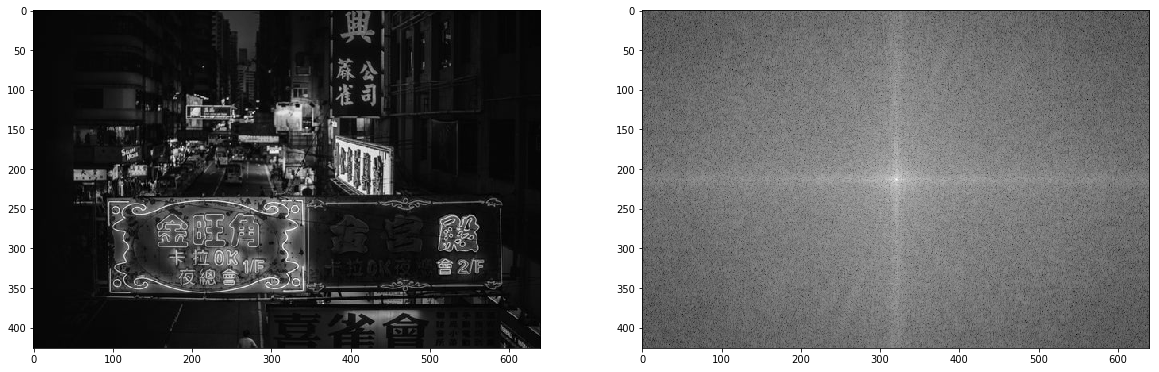

<Figure size 1440x720 with 0 Axes>

In [159]:
img = cv2.imread('teste3.jpg',0)
# 426x640
M = 426
N = 640
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [244]:
for i in range(M):
    for j in range(N):
        fshift[i][j] = fshift[i][j] * passaAltaGauss(M,N,i,j,190)

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x720 with 0 Axes>

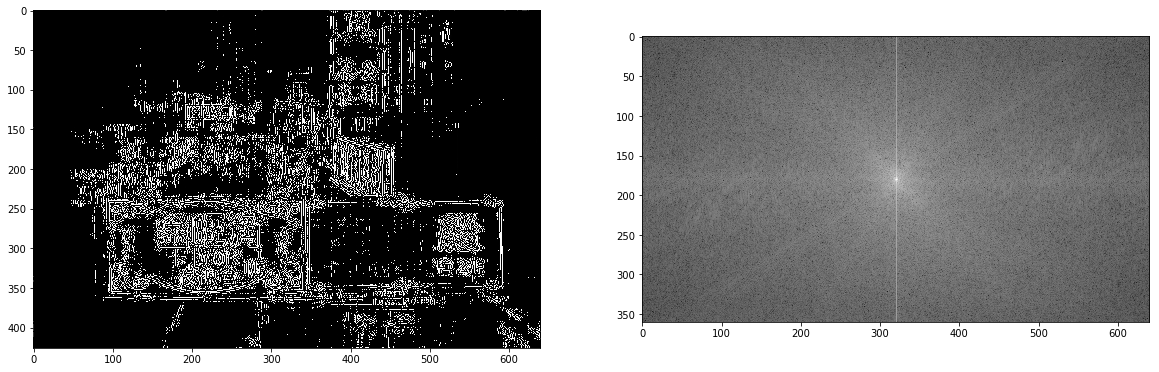

<Figure size 1440x720 with 0 Axes>

In [245]:
magnitude_spectrum2 = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fshift))), cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


<Figure size 1440x720 with 0 Axes>

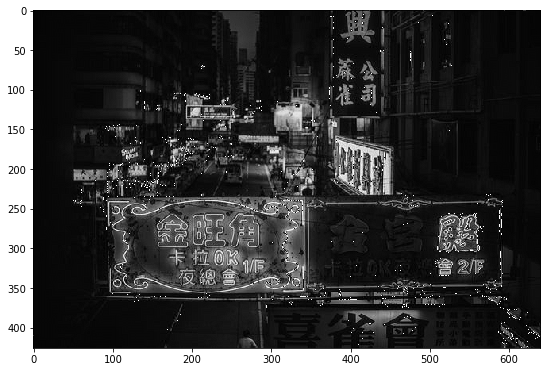

<Figure size 1440x720 with 0 Axes>

In [165]:
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(f + np.fft.ifftshift(fshift))), cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))


In [272]:
def passaAltaGauss(M,N,u,v,desv):
    #filtro passa alta dominio de frequencia de figura com tamanho MxN
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 - np.exp(-D2/(2*desv**2))

def passaBaixaGauss(M,N,u,v,desv):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return np.exp(-D2/(2*desv**2))

def passaBaixaButterworth(M,N,u,v,D0,n):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 / (1 + (D2/(D0**2))**n)

def passaBaixaButterworth(M,N,u,v,D0,n):
    D2 = (u - M/2)**2 + (v - N/2)**2
    return 1 / (1 + (D2/(D0**2))**n)

<Figure size 1440x720 with 0 Axes>

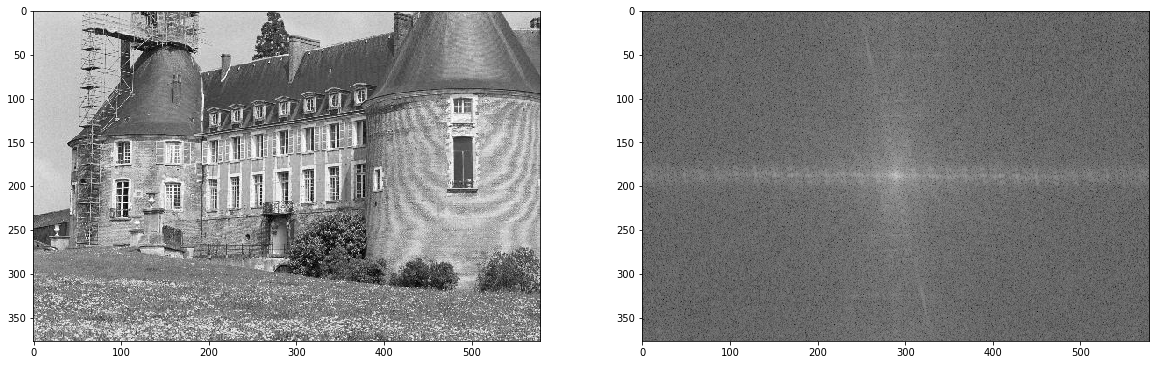

<Figure size 1440x720 with 0 Axes>

In [171]:
img2 = cv2.imread('alias-ex.jpg',0)
[M2, N2] = img2.shape
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))

plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10]) 
plt.figure(figsize=(20,10))

In [195]:
nfshift2 = fshift2.copy()
for i in range(0,150):
    for j in range(0,N2):
        nfshift2[i,j] = 0.00005
        nfshift2[376-i,j] = 0.00005
        nfshift2[i,578-j] = 0.00005
        nfshift2[376-i,578-j] = 0.00005

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


<Figure size 1440x720 with 0 Axes>

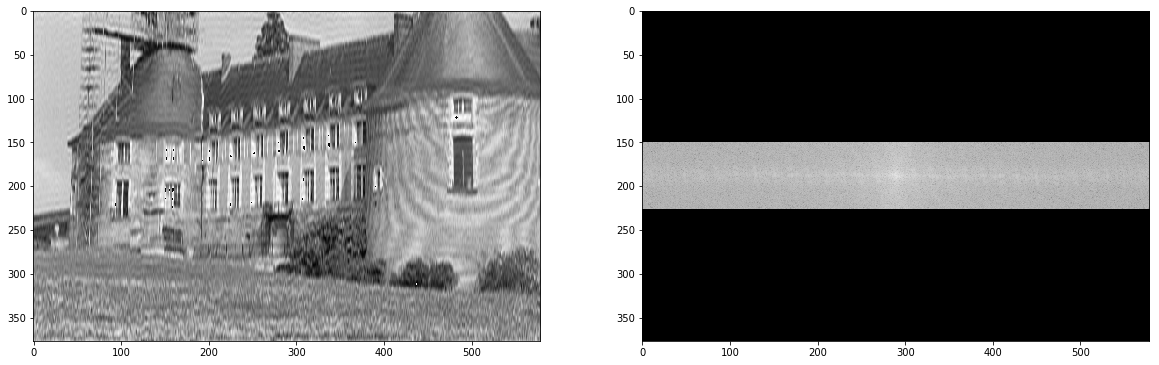

<Figure size 1440x720 with 0 Axes>

In [197]:
ms = 20*np.log(np.abs(nfshift2))
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(nfshift2))), cmap = 'gray')
plt.subplot(122),plt.imshow(ms, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [283]:
DAT = fshift2.copy()
for i in range(M2):
    for j in range(N2):
        DAT[i,j] = DAT[i,j] * passaAltaGauss(M,N,i,j,150)

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


<Figure size 1440x720 with 0 Axes>

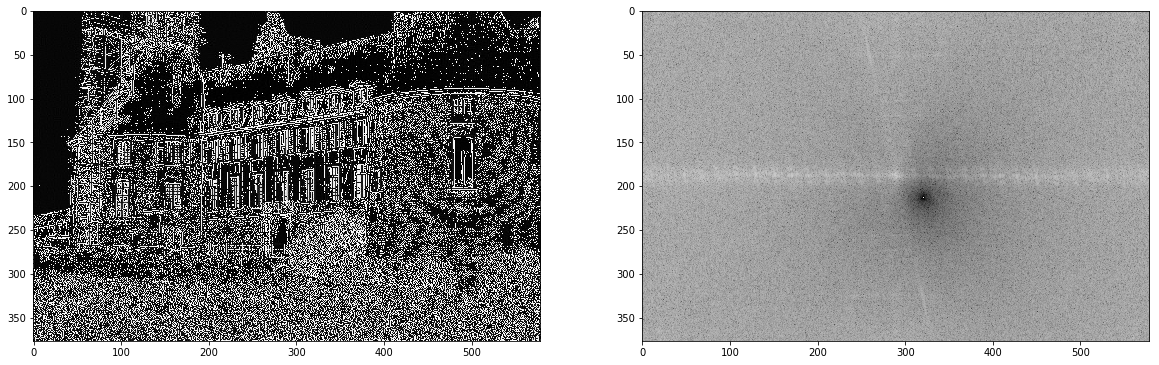

<Figure size 1440x720 with 0 Axes>

In [284]:
msab = 20*np.log(np.abs(DAT))
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(DAT))), cmap = 'gray')
plt.subplot(122),plt.imshow(msab, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [ ]:
DAT = 
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fshift))), cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

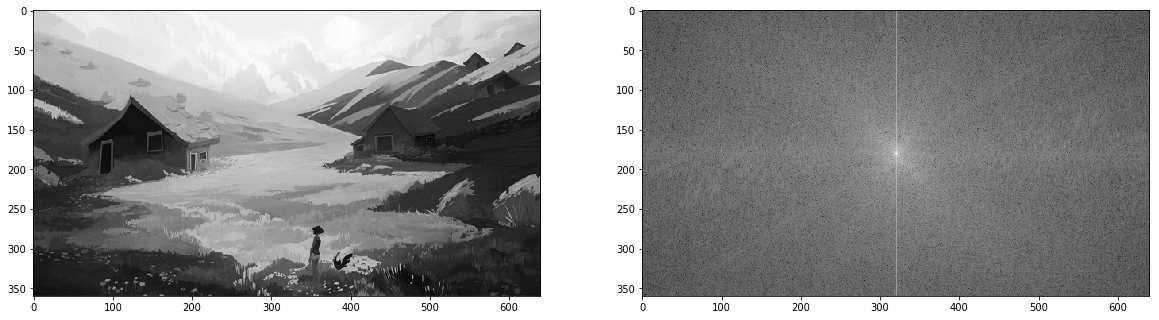

<Figure size 1440x720 with 0 Axes>

In [241]:
img4 = cv2.imread('teste4.png',0)
(M4, N4) = img4.shape
f4 = np.fft.fft2(img4)
fshift4 = np.fft.fftshift(f4)
magnitude_spectrum = 20*np.log(np.abs(fshift4))

plt.subplot(121),plt.imshow(img4, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


<Figure size 1440x720 with 0 Axes>

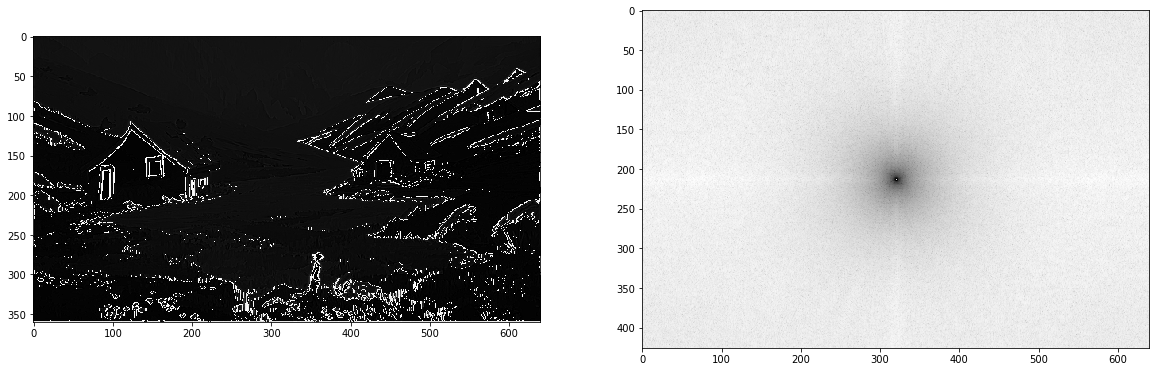

<Figure size 1440x720 with 0 Axes>

In [267]:
fsm = fshift4.copy()
for i in range(M4):
    for j in range(N4):
        fsm[i,j] = fsm[i,j] * passaAltaGauss(M,N,i,j,80)
        
magnitude_spectrum4 = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fsm))), cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum4, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

/home/gambitura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


<Figure size 1440x720 with 0 Axes>

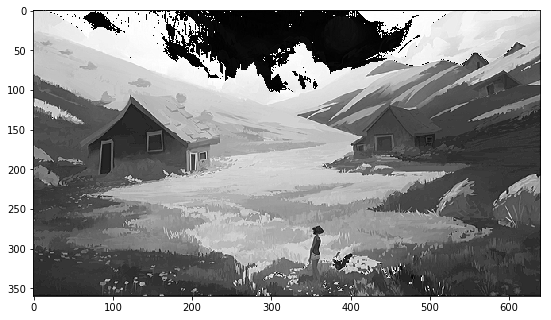

<Figure size 1440x720 with 0 Axes>

In [268]:
plt.subplot(121),plt.imshow(np.uint8(np.fft.ifft2(np.fft.ifftshift(fshift4 + fsm))), cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))

In [269]:
np.uint8(np.random.rand(4,3))

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [111]:
img.shape

(426, 640)

<Figure size 1440x720 with 0 Axes>

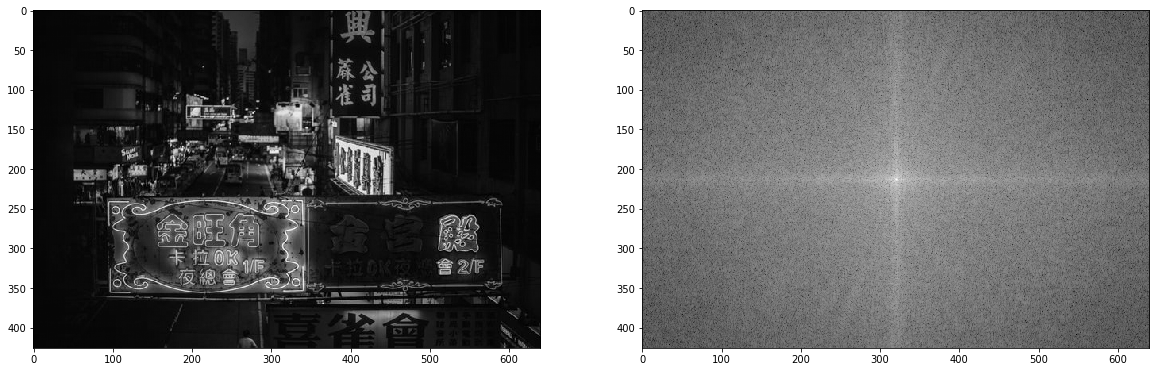

<Figure size 1440x720 with 0 Axes>

In [85]:
s = np.fft.ifft2(f)
S = np.empty((M,N), dtype='uint8')
for i in range(M):
    for j in range(N):
        S[i][j] = np.uint8(s[i][j].real)
plt.subplot(121),plt.imshow(S, cmap = 'gray')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.rcParams["figure.figsize"] = np.array([20,10])
plt.figure(figsize=(20,10))